In [414]:
import numpy as np
import matplotlib.pyplot as plt

In [415]:
def print_matrix(matrix, left_cols=None, right_cols=None):
    if len(matrix.shape) == 2:
        if left_cols is None:
            for i in range(matrix.shape[0]):
                row = ''
                for j in range(matrix.shape[1]):
                    kek = matrix[i][j]
                    if kek > 0:
                        row += str((round(kek, 5))) + ' & '
                    else:
                        row += str((round(kek, 4))) + ' & '
                row = row[:-2]
                row += '\\\\'
                print(row)
        else:
            for i in range(matrix.shape[0]):
                row = ''
                for j in range(left_cols):
                    kek = matrix[i][j]
                    if kek > 0:
                        row += str((round(kek, 5))) + ' & '
                    else:
                        row += str((round(kek, 4))) + ' & '
                row += '\ldots & '
                for j in range(matrix.shape[1] - right_cols, matrix.shape[1]):
                    kek = matrix[i][j]
                    if kek > 0:
                        row += str((round(kek, 5))) + ' & '
                    else:
                        row += str((round(kek, 4))) + ' & '
                row = row[:-2]
                row += '\\\\'
                print(row)
    elif len(matrix.shape) == 1:
        row = ''
        for i in range(matrix.shape[0]):
            kek = matrix[i]
            if kek > 0:
                row += str((round(kek, 5))) + ' \\\\ '
            else:
                row += str((round(kek, 4))) + ' \\\\ '
        print(row)

In [416]:
N = 1
# N = 1
a = 0
b = (N+7)/N
# b= 8/7
n = 51
m = 20
lambd = 1/(1+(n-45)/2)
# lambd=0.75
h = (b-a)/m
def K_line_element(s, t):
    return t*(2*b-s)
s = np.linspace(a,b,m+1)
s_center = (s[1:]+s[:-1])/2
y = [(N+3)/N*(val**2+(n-53)/2) for val in s_center]
# y = [b*(val**3+val**2+4) for val in s_center]
print(lambd)
print_matrix(s_center)

0.25
0.2 \\ 0.6 \\ 1.0 \\ 1.4 \\ 1.8 \\ 2.2 \\ 2.6 \\ 3.0 \\ 3.4 \\ 3.8 \\ 4.2 \\ 4.6 \\ 5.0 \\ 5.4 \\ 5.8 \\ 6.2 \\ 6.6 \\ 7.0 \\ 7.4 \\ 7.8 \\ 


In [417]:
K = np.zeros((m,m))
for i in range(m):
    for j in range(i+1):
        K[i,j] = K_line_element(s_center[i], s_center[j])
        K[j,i] = K[i,j]
print_matrix(K, 5, 5)

3.16 & 3.08 & 3.0 & 2.92 & 2.84 & \ldots & 1.96 & 1.88 & 1.8 & 1.72 & 1.64 \\
3.08 & 9.24 & 9.0 & 8.76 & 8.52 & \ldots & 5.88 & 5.64 & 5.4 & 5.16 & 4.92 \\
3.0 & 9.0 & 15.0 & 14.6 & 14.2 & \ldots & 9.8 & 9.4 & 9.0 & 8.6 & 8.2 \\
2.92 & 8.76 & 14.6 & 20.44 & 19.88 & \ldots & 13.72 & 13.16 & 12.6 & 12.04 & 11.48 \\
2.84 & 8.52 & 14.2 & 19.88 & 25.56 & \ldots & 17.64 & 16.92 & 16.2 & 15.48 & 14.76 \\
2.76 & 8.28 & 13.8 & 19.32 & 24.84 & \ldots & 21.56 & 20.68 & 19.8 & 18.92 & 18.04 \\
2.68 & 8.04 & 13.4 & 18.76 & 24.12 & \ldots & 25.48 & 24.44 & 23.4 & 22.36 & 21.32 \\
2.6 & 7.8 & 13.0 & 18.2 & 23.4 & \ldots & 29.4 & 28.2 & 27.0 & 25.8 & 24.6 \\
2.52 & 7.56 & 12.6 & 17.64 & 22.68 & \ldots & 33.32 & 31.96 & 30.6 & 29.24 & 27.88 \\
2.44 & 7.32 & 12.2 & 17.08 & 21.96 & \ldots & 37.24 & 35.72 & 34.2 & 32.68 & 31.16 \\
2.36 & 7.08 & 11.8 & 16.52 & 21.24 & \ldots & 41.16 & 39.48 & 37.8 & 36.12 & 34.44 \\
2.28 & 6.84 & 11.4 & 15.96 & 20.52 & \ldots & 45.08 & 43.24 & 41.4 & 39.56 & 37.72 \\
2.2 &

In [418]:
F = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        d=1 if i==j else 0
        F[i,j] = (d-lambd*K[i,j]*h)
print_matrix(F, 5, 5)

0.684 & -0.308 & -0.3 & -0.292 & -0.284 & \ldots & -0.196 & -0.188 & -0.18 & -0.172 & -0.164 \\
-0.308 & 0.076 & -0.9 & -0.876 & -0.852 & \ldots & -0.588 & -0.564 & -0.54 & -0.516 & -0.492 \\
-0.3 & -0.9 & -0.5 & -1.46 & -1.42 & \ldots & -0.98 & -0.94 & -0.9 & -0.86 & -0.82 \\
-0.292 & -0.876 & -1.46 & -1.044 & -1.988 & \ldots & -1.372 & -1.316 & -1.26 & -1.204 & -1.148 \\
-0.284 & -0.852 & -1.42 & -1.988 & -1.556 & \ldots & -1.764 & -1.692 & -1.62 & -1.548 & -1.476 \\
-0.276 & -0.828 & -1.38 & -1.932 & -2.484 & \ldots & -2.156 & -2.068 & -1.98 & -1.892 & -1.804 \\
-0.268 & -0.804 & -1.34 & -1.876 & -2.412 & \ldots & -2.548 & -2.444 & -2.34 & -2.236 & -2.132 \\
-0.26 & -0.78 & -1.3 & -1.82 & -2.34 & \ldots & -2.94 & -2.82 & -2.7 & -2.58 & -2.46 \\
-0.252 & -0.756 & -1.26 & -1.764 & -2.268 & \ldots & -3.332 & -3.196 & -3.06 & -2.924 & -2.788 \\
-0.244 & -0.732 & -1.22 & -1.708 & -2.196 & \ldots & -3.724 & -3.572 & -3.42 & -3.268 & -3.116 \\
-0.236 & -0.708 & -1.18 & -1.652 & -2.124 & \l

In [419]:
F_inv = np.linalg.inv(F)
print_matrix(F_inv, 4, 4)

1.43656 & 0.39028 & 0.09423 & -0.2621 & \ldots & 0.43195 & 0.1894 & -0.1744 & -0.4265 \\
0.39028 & 1.92107 & 0.22237 & -0.6186 & \ldots & 1.01939 & 0.44699 & -0.4115 & -1.0066 \\
0.09423 & 0.22237 & 1.2082 & -0.5792 & \ldots & 0.95443 & 0.41851 & -0.3853 & -0.9425 \\
-0.2621 & -0.6186 & -0.5792 & 0.83091 & \ldots & 0.27863 & 0.12218 & -0.1125 & -0.2751 \\
-0.4507 & -1.0637 & -0.9959 & -0.2907 & \ldots & -0.5755 & -0.2523 & 0.2323 & 0.56828 \\
-0.3509 & -0.828 & -0.7753 & -0.2263 & \ldots & -1.0613 & -0.4654 & 0.4284 & 1.04799 \\
-0.0264 & -0.0624 & -0.0584 & -0.0171 & \ldots & -0.8679 & -0.3806 & 0.35032 & 0.85699 \\
0.31491 & 0.74318 & 0.69582 & 0.20313 & \ldots & -0.119 & -0.0522 & 0.04804 & 0.11752 \\
0.45471 & 1.07311 & 1.00472 & 0.29331 & \ldots & 0.70602 & 0.30958 & -0.285 & -0.6972 \\
0.3035 & 0.71625 & 0.67061 & 0.19577 & \ldots & 1.0792 & 0.47322 & -0.4356 & -1.0657 \\
-0.042 & -0.099 & -0.0927 & -0.0271 & \ldots & 0.76169 & 0.33399 & -0.3075 & -0.7521 \\
-0.3606 & -0.8509 & -

In [420]:
print_matrix(np.array(y))

-3.84 \\ -2.56 \\ 0.0 \\ 3.84 \\ 8.96 \\ 15.36 \\ 23.04 \\ 32.0 \\ 42.24 \\ 53.76 \\ 66.56 \\ 80.64 \\ 96.0 \\ 112.64 \\ 130.56 \\ 149.76 \\ 170.24 \\ 192.0 \\ 215.04 \\ 239.36 \\ 


In [421]:
x_vect = np.linalg.solve(F, y)
print_matrix(x_vect)

-30.7449 \\ -63.5981 \\ -54.4684 \\ -9.199 \\ 43.2378 \\ 69.2824 \\ 52.26627 \\ 3.07972 \\ -46.7978 \\ -65.4448 \\ -40.9271 \\ 11.06397 \\ 57.25407 \\ 68.08157 \\ 36.61686 \\ -17.0026 \\ -58.4604 \\ -61.2236 \\ -23.5236 \\ 30.51147 \\ 


[0.00402 0.02357 0.06217]
[0.25359 0.61415 0.99733]
[127.310857682328, -67.8680043992385, 20.2340977930667]


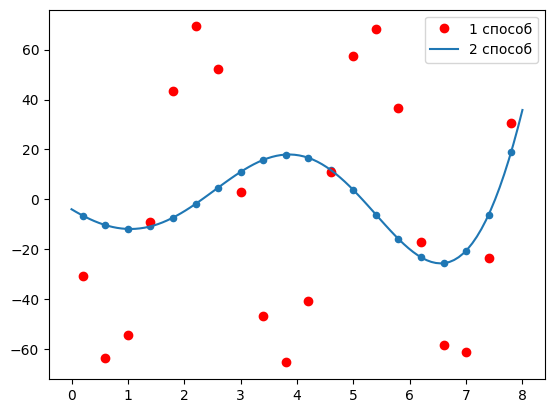

In [422]:
import sympy as sy
from sympy.solvers import solve
x = sy.Symbol("x")
tau = b*np.sqrt(2*(N+7)/N)
def uravnenie(x):
    return np.sin(b*np.sqrt(2*(N+7)/N*x))+b*np.sqrt(2*(N+7)/N*x)*np.cos(b*np.sqrt(2*(N+7)/N*x))
tangenses = [2.02875783811043, 4.91318043943488, 7.97866571241324]
l = []
for t in tangenses:
   l.append(t**2/(b**3*2))

print(np.round(l, 5))

def fi(l_i):
    return np.sqrt(2*(N+7)/N*l_i)

# def fi(l_i):
#     return np.sqrt(36/11*l_i)

f_i = [fi(l_i) for l_i in l]

print(np.round(f_i, 5))

def f_top(k, x):
    return (N+3)/N*(x**2+(n-53)/2)*sy.sin(k*x)

def f_bot(k, x):
    return (sy.sin(k*x))**2


alpha = []
for k in f_i:
    top = sy.integrate(f_top(k, x), (x, a, b))
    bot = sy.integrate(f_bot(k, x), (x, a, b))
    alpha.append(top/bot)

print(alpha)

def answ(x):
    return (N+3)/N*(x**2+(n-53)/2)+ lambd*(alpha[0]/(l[0]-lambd)*np.sin(f_i[0]*x) + alpha[1]/(l[1]-lambd)*np.sin(f_i[1]*x) + alpha[2]/(l[2]-lambd)*np.sin(f_i[2]*x))

graph_x = np.linspace(a, b, 100)

plt.plot(s_center, x_vect , 'ro', label='1 способ')
plt.plot(graph_x, answ(graph_x), label='2 способ')
plt.scatter(s_center, answ(s_center), s=20, marker='o')
plt.legend()
plt.savefig('graph.png')
plt.show()

In [423]:
koefts_fi = []
koefts_fi.append(alpha[0]/(l[0]-lambd))
koefts_fi.append(alpha[1]/(l[1]-lambd))
koefts_fi.append(alpha[2]/(l[2]-lambd))
print(koefts_fi)

[-517.564612924199, 299.735354472883, -107.723925830332]


In [424]:
import pandas as pd

df = pd.DataFrame({'x': s_center, 'anal': x_vect})
df['pribl'] = [answ(val) for val in s_center]
df['error'] = df['anal'] - df['pribl']

max_error = abs(df['error']).max()
print(max_error)
df

83.3604570763091


,x,anal,pribl,error
0,0.2,-30.744945,-6.55509105617960,-24.1898537281360
1,0.6,-63.598070,-10.3510546213542,-53.2470150696306
2,1.0,-54.468430,-11.9035692024972,-42.5648607929266
3,1.4,-9.198995,-10.8823349163415,1.68333981355009
4,1.8,43.237797,-7.36276496963399,50.6005616252613
5,2.2,69.282399,-1.87445294736518,71.1568515018099
6,2.6,52.266265,4.64084811517975,47.6254172632376
7,3.0,3.079722,10.9585116344677,-7.87878927426469
8,3.4,-46.797843,15.7692630837827,-62.5671060523241
9,3.8,-65.444789,17.9156682788900,-83.3604570763091


In [425]:
last_table = []
for i in range(len(s_center)):
    last_table.append([s_center[i], x_vect[i], answ(s_center[i]), abs(x_vect[i]-answ(s_center[i]))])
last_table = np.array(last_table)
print_matrix(last_table)

0.2 & -30.7449 & -6.5551 & 24.18985 \\
0.6 & -63.5981 & -10.3511 & 53.24702 \\
1.0 & -54.4684 & -11.9036 & 42.56486 \\
1.4 & -9.199 & -10.8823 & 1.68334 \\
1.8 & 43.2378 & -7.3628 & 50.60056 \\
2.2 & 69.2824 & -1.8745 & 71.15685 \\
2.6 & 52.26627 & 4.64085 & 47.62542 \\
3.0 & 3.07972 & 10.95851 & 7.87879 \\
3.4 & -46.7978 & 15.76926 & 62.56711 \\
3.8 & -65.4448 & 17.91567 & 83.36046 \\
4.2 & -40.9271 & 16.62864 & 57.55571 \\
4.6 & 11.06397 & 11.72420 & 0.66022 \\
5.0 & 57.25407 & 3.72566 & 53.52842 \\
5.4 & 68.08157 & -6.1131 & 74.19464 \\
5.8 & 36.61686 & -15.8926 & 52.50948 \\
6.2 & -17.0026 & -23.2547 & 6.25203 \\
6.6 & -58.4604 & -25.6471 & 32.81331 \\
7.0 & -61.2236 & -20.6325 & 40.59111 \\
7.4 & -23.5236 & -6.1960 & 17.32758 \\
7.8 & 30.51147 & 18.98897 & 11.52249 \\
